In [18]:
train.data <- read.csv(file.path("..", "data", "training_data.csv"))
test.data <- read.csv(file.path("..", "data", "test_data.csv"))

In [19]:
#delets dependent variables
train.dub <- train.data[!duplicated(as.list(train.data))]


In [20]:
set.seed(2)

#data set with VALENCE.PLEASANTNESS + V.. (with low varinace)
length <- length(train.dub[1,])
pca.data <- data.frame(train.dub[,4:length])
idx.zero.var <- apply(pca.data[,], 2, var) == 0
pca.data <- pca.data[,!idx.zero.var]
pca.data$VALENCE.PLEASANTNESS <- train.data$VALENCE.PLEASANTNESS

#split the data set into a training set and a validation set
dim <- length(pca.data[,1])
idx.validation <- sample(1:dim, dim/3)

train <- pca.data[-idx.validation,]
validation <- pca.data[idx.validation,]




In [23]:
library(plotrix)
len <- length(train[1,])
train.pca <- train[,-len]
validation.pca <- validation[,-len]

colors.train <- color.scale(train[,len], c(0,1,1),c(1,1,0),0)
colors.validation <- color.scale(validation[,len], c(0,1,1),c(1,1,0),0)

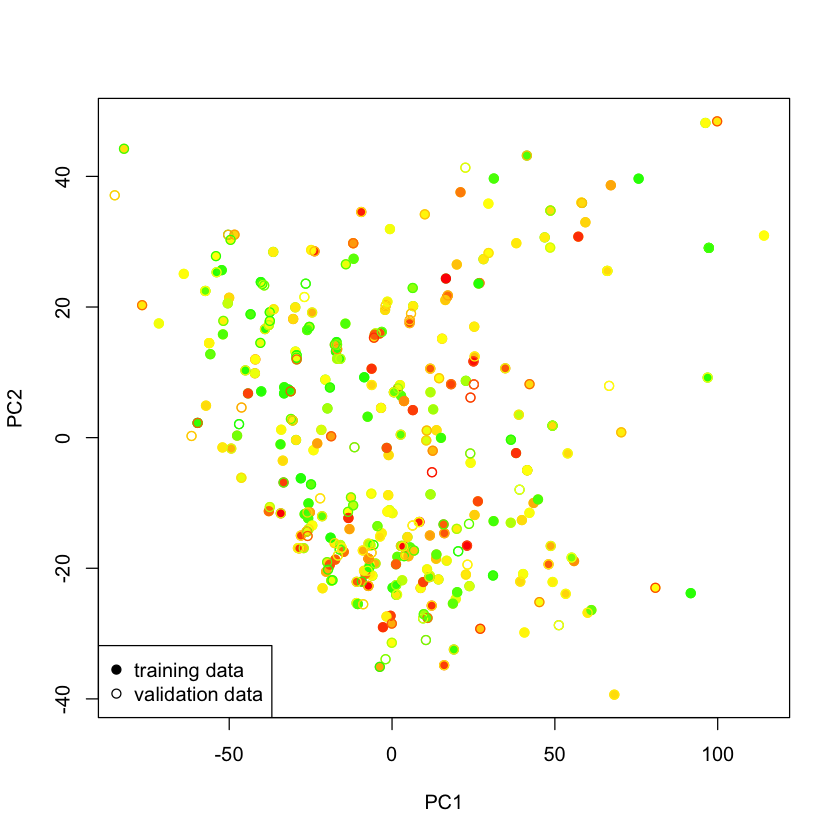

In [26]:
pca <- prcomp(train.pca, scale = T)
p.pca <- predict(pca, newdata=validation.pca)

plot(pca$x[,1:2], col = colors.train, pch = 19)
points(p.pca[,1:2], col = colors.validation)
legend("bottomleft", legend=c("training data", "validation data"), col=1, pch=c(19,1))


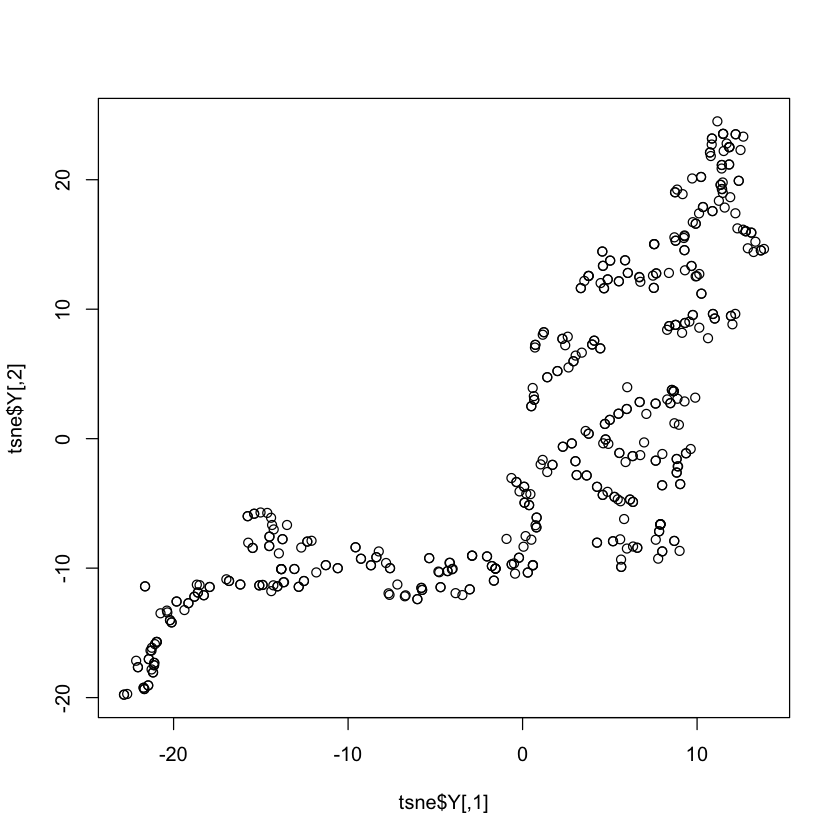

In [17]:
#t-SNE
library(Rtsne)
tsne <- Rtsne(train, check_duplicates = FALSE)
plot(tsne$Y)